In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
from matplotlib.colors import ListedColormap

In [3]:
from IPython.display import display
from ipywidgets import IntSlider

In [4]:
from sklearn.model_selection import train_test_split

In [125]:
import cv2

In [5]:
class AdaLineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])

        self.cost_ = []
        
        for i in  range(self.n_iter ):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors) 
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            
            self.cost_.append(cost)
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    def activation(self, X):
        return X
        #return 1.0 / (1.0 + np.exp(- X ))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

### Начнем с чего-то по проще

#### Научим персептрон понимать, может ли он ставить крест

In [16]:
X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
    
])

y1 =  np.array([1,1,1,1, -1,-1,-1,-1])

y2 = np.array([1,1, -1,-1, 1,1, -1,-1])

y3 = np.array([1, -1, 1, -1, 1, -1, 1, -1])

In [17]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2, random_state=1, stratify=y1 )
X_test1

array([[1, 0, 1],
       [0, 1, 1]])

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.2, random_state=1, stratify=y2 )
X_test2

array([[0, 1, 1],
       [1, 0, 1]])

In [19]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size = 0.2, random_state=1, stratify=y3 )
X_test3


array([[0, 1, 1],
       [1, 1, 0]])

In [20]:
ada1 = AdaLineGD( eta=0.01, n_iter=100, random_state=1)
ada2 = AdaLineGD( eta=0.01, n_iter=100, random_state=1)
ada3 = AdaLineGD( eta=0.01, n_iter=100, random_state=1)

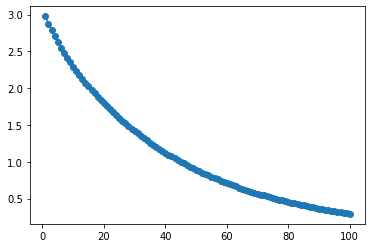

In [21]:
ada1.fit(X_train1, y_train1)
plt.plot(range(1, len(ada1.cost_)+ 1), ada1.cost_, marker='o' )
plt.show()

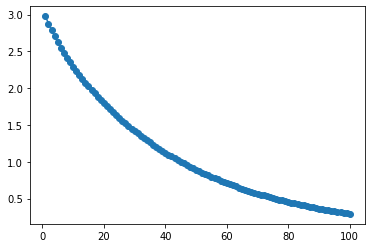

In [22]:
ada2.fit(X_train2, y_train2)
plt.plot(range(1, len(ada2.cost_)+ 1), ada2.cost_, marker='o' )
plt.show()

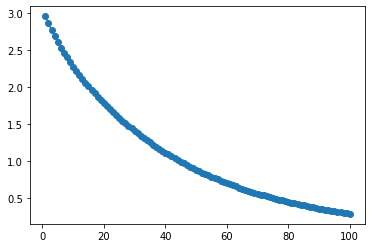

In [23]:
ada3.fit(X_train3, y_train3)
plt.plot(range(1, len(ada3.cost_)+ 1), ada3.cost_, marker='o' )
plt.show()

## Проверяем и..

In [200]:
ada3.predict([1, 0, 1])

array(-1)

In [25]:
ada3.w_

array([ 0.64264811, -0.10946316,  0.10802549, -1.37908667])

# Работает!

##  Модифицируем, приблизя к реальной задаче


#### Напомню, задача: ставить -1 там, где положительные числа

In [242]:
X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
    
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    [-1,-1,0],
    [-1,-1,-1],
    
])
X = np.where(X == -1, 2, X)
X = np.where(X == 0, -1, X)
y1 =  np.array([1,1,1,1, -1,-1,-1,-1,       1,1,1, -1,-1,-1,-1])

y2 = np.array([1,1, -1,-1, 1,1, -1,-1, 1,   -1,-1, 1,1, -1,-1])

y3 = np.array([1, -1, 1, -1, 1, -1, 1, -1,    -1, 1, -1, 1, -1, 1, -1])
X

array([[-1, -1, -1],
       [-1, -1,  1],
       [-1,  1, -1],
       [-1,  1,  1],
       [ 1, -1, -1],
       [ 1, -1,  1],
       [ 1,  1, -1],
       [ 1,  1,  1],
       [-1, -1,  2],
       [-1,  2, -1],
       [-1,  2,  2],
       [ 2, -1, -1],
       [ 2, -1,  2],
       [ 2,  2, -1],
       [ 2,  2,  2]])

### Размерность тестовой выботки можно уменьшить, но это не обязательно

In [243]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.1, random_state=1, stratify=y1 )
X_test1

array([[-1,  2, -1],
       [ 2, -1,  2]])

In [244]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.1, random_state=1, stratify=y2 )
X_test2

array([[ 2, -1, -1],
       [-1,  2,  2]])

In [245]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size = 0.1, random_state=1, stratify=y3 )
X_test3

array([[ 2, -1, -1],
       [-1,  2,  2]])

In [253]:
ada1 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)
ada2 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)
ada3 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)

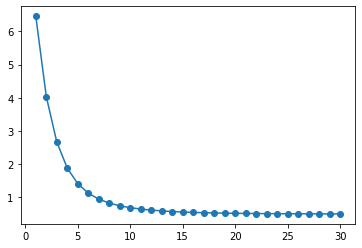

In [254]:
ada1.fit(X_train1, y_train1)
plt.plot(range(1, len(ada1.cost_)+ 1), ada1.cost_, marker='o' )
plt.show()

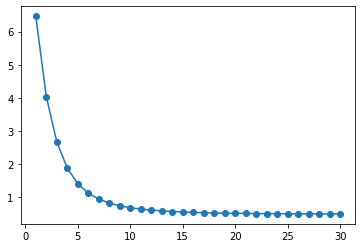

In [255]:
ada2.fit(X_train2, y_train2)
plt.plot(range(1, len(ada2.cost_)+ 1), ada2.cost_, marker='o' )
plt.show()

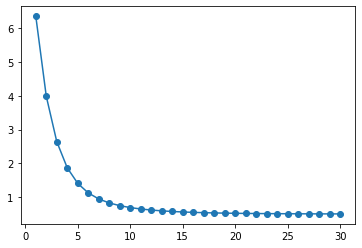

In [256]:
ada3.fit(X_train3, y_train3)
plt.plot(range(1, len(ada3.cost_)+ 1), ada3.cost_, marker='o' )
plt.show()

In [265]:
ada1.predict([10, 1, 10])

array(-1)

In [258]:
ada2.predict([-1,-1, 2])

array(1)

In [259]:
ada3.predict([-1, 1, 2])

array(-1)

# Мы должны научиться понимать, какая из линий выигрышная

## Считаем, что:
###  -1 в X это противник нашей нейронной сети
### и что сейчас именно наш ход

Здесь мы искусственно расширили ситуации выигрышных линий, для уравновешивания шансов

In [302]:
X_win = np.array([
    [0,0,0],
    [0,0,0],
    [0,0,0],
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,0],
    [1,1,0],
    [0,1,1],
    [0,1,1],
    
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1],

    [-1,-1,0],
   
])

X_win = np.where(X_win == -1, 10, X_win)
X_win = np.where(X_win == 0, -1, X_win)

y_win = np.array([-1,-1,-1,-1, -1, -1, 1, -1, 1, 1,     1,1,1,1,
                  -1,  -1, -1, -1,]) 


In [303]:
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(X_win, y_win, test_size = 0.2, 
                                                                    random_state=1, stratify=y_win )
X_test_win

array([[ 1, -1,  1],
       [-1, 10, -1],
       [-1,  1,  1],
       [-1,  1, -1]])

#### Потребовалось уменьшить скорость обучения

In [304]:
ada_win = AdaLineGD( eta=0.001, n_iter=100, random_state=1)

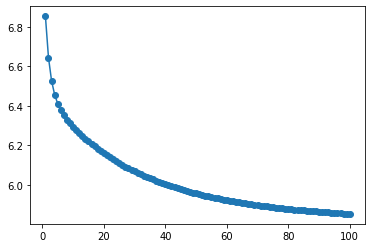

In [305]:
ada_win.fit(X_train_win, y_train_win)
plt.plot(range(1, len(ada_win.cost_)+ 1), ada_win.cost_, marker='o' )
plt.show()

### нейрон ada_win:
#### игроман
#### ставит всё на удачу
#### безумно хочет выиграть
#### всегда и во всём
#### карманы всегда полны талисманами на удачу

In [306]:
ada_win.predict([-1,-1,-1])

array(-1)

# Отлично
## Теперь подумаем о всём самом пхохом
## Будем переживать за каждую мелочь

### Научим новый персептрон 

## Нейрон ada_lose

#### Пессимист
#### Нервный
#### Боится проиграть
#### Весь в комплексах
#### Три раза проверяет, выключил ли он газовую плиту

In [43]:
X_lose = np.array([
    [0,0,0],
    [0,0,1],

    [0,1,1],

    [1,0,1],
    [1,1,0],
        
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1], #
    [-1,0,0],
    [-1,0,-1],#
    [-1,-1,0],#
    
    [-1,0,-1],#
    [-1,-1,0],#
    [0,-1,-1],#
    [-1,-1,0],#
    
     #[-1,0,-1],#
   # [-1,0,-1],#
    [-1,-1,0],#
    [-1,-1,0],#
    
    [0,1,-1],
    [-1,0,1],
    [1,-1,0],
    
    [1,0,-1],
    [-1,1,0],
    [0,-1,1],
])

X_lose = np.where(X_lose == -1, 10, X_lose)
X_lose = np.where(X_lose == 0, -1, X_lose)


y_lose = np.array([ -1, -1, -1, -1, -1, 
                    -1,  -1, 1,  -1, 1, 1,
                   1, 1, 1, 1, 1, 1, #1, #1,
                   -1, -1,-1,-1, -1, -1
])



In [44]:
X_train_lose, X_test_lose, y_train_lose, y_test_lose = train_test_split(X_lose, y_lose, test_size = 0.1, 
                                                                    random_state=1, stratify=y_lose)
X_test_lose

array([[ 1, -1, 10],
       [10, 10, -1],
       [-1, -1, 10]])

In [45]:
ada_lose = AdaLineGD( eta=0.001, n_iter=400, random_state=1)

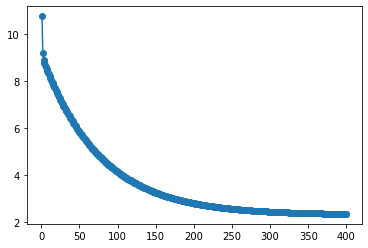

In [46]:
ada_lose.fit(X_train_lose, y_train_lose)
plt.plot(range(1, len(ada_lose.cost_)+ 1), ada_lose.cost_, marker='o' )
plt.show()

In [47]:
ada_lose.predict([10,1,0])

array(-1)

# Замечательно

##  А давайте научим ещё один!

### Нейрон ada_free:
#### Беззаботный
#### Ни о чем не беспокоится
#### Ищет самые легкие пути
#### Никогда его не встретишь в тёмных переулках

In [48]:
X_free = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],

    
    [0,0,-1],
    [0,-1,0],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    [-1,-1,0],
    
    
])

X_free = np.where(X_free == -1, 10, X_free)
X_free = np.where(X_free == 0, -1, X_free)


y_free = np.array([1,1,1,1,1,1,1,
                  -1,-1,-1,-1,-1,-1,-1,])
y_free.shape

(14,)

In [49]:
X_train_free, X_test_free, y_train_free, y_test_free = train_test_split(X_free, y_free, test_size = 0.1, 
                                                                    random_state=1, stratify=y_free)
X_test_free

array([[ 1, -1,  1],
       [10, -1, 10]])

In [50]:
ada_free = AdaLineGD( eta=0.001, n_iter=400, random_state=1)

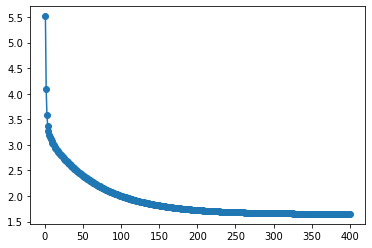

In [51]:
ada_free.fit(X_train_free, y_train_free)
plt.plot(range(1, len(ada_free.cost_)+ 1), ada_free.cost_, marker='o' )
plt.show()

In [52]:
ada_free.predict([0,0,1])

array(1)

# И ещё один

### Нейрон ada_zen:
#### Смирившийся
#### Всё тлен
#### Есть только дзен
#### Любит баланс
#### Особенно положительный.. на сберегательной карте

In [113]:
X_zen = np.array([
    #[0,0,1],    
    [0,1,0],
    [0,1,1],
    [1,0,0],
    
    #[1,0,1],
    
    [1,1,0],
    
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    #[-1,-1,0],
    
    [-1, 0, 1],
    [1, 0, -1],
    [0, 1, -1],
    [0, -1, 1],
    [1,-1, 0],
    [-1, 1, 0],
    [0, 1, -1],
   [-1, 0, 1],
    [-1, 1, 0],
    [1, 0, -1],
    [0, 1, -1],
])
X_zen = np.where(X_zen == -1, 10, X_zen)
X_zen = np.where(X_zen == 0, -1, X_zen)

y_zen = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1,       # -1, -1, #-1, #-1
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
                 ])




In [114]:
X_train_zen, X_test_zen, y_train_zen, y_test_zen = train_test_split(X_zen, y_zen, test_size = 0.1, 
                                                                    random_state=1, stratify=y_zen)
X_test_zen

array([[-1, 10, -1],
       [10, -1,  1]])

In [120]:
ada_zen = AdaLineGD( eta=0.001, n_iter=600, random_state=1)

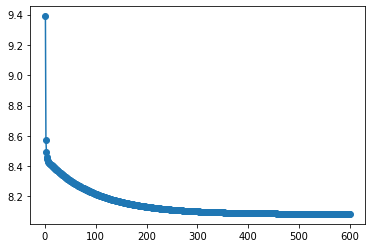

In [121]:
ada_zen.fit(X_train_zen, y_train_zen)
plt.plot(range(1, len(ada_zen.cost_)+ 1), ada_zen.cost_, marker='o' )
plt.show()

In [124]:
ada_zen.predict([1, -1,10])

array(1)

# Теперь приступим к оформлению крестиков-ноликов

## Да, самое время

Сетка из drawwy

In [126]:
def grid(cnv, xstep, ystep, clr=(0, 0, 0)):
    cnv[::ystep, :] = clr
    cnv[:, ::xstep] = clr

Оттуда же

In [ ]:
# 1) Нарисовать Крестик
# 2) Изменить значение в X_pure


In [320]:
def draw(event, x, y, flags, param):
    x_ = x // 200
    y_ = y // 200
   
    x = x - x%200 + 1
    y = y - y%200 + 1
    power = 100
    try:
        if flags == 1:
            # cnv[y:199+y, x:x+199] = (0, 0, 0)
            cv2.line(cnv, (x + 10, y + 10), (x+199 - 10, y+199 - 10), (0, 0, 0), 10 )
            cv2.line(cnv, (x + 10 , y + 199 + 10), (x+199 - 10, y  + 10), (0, 0, 0), 10 )
            
            marked(X_pure,10 , int(x//200), int(y//200)  )
            
            #X_in[y_, x_] = 255
            
        #elif flags == 2:
        #    cnv[y:199+y, x:x+199] = (255, 255, 255)
        #    X_in[y_, x_] = 0
        if event == 4:
            score = predict(X_pure)
            max_score_index = score.index(max(score))
            draw_Ous (max_score_index, 200)
            X_pure[max_score_index] = 1
            print(max_score_index , score)
    except:
        pass

# 0 1 2 - 3 4 5 - 6 7 8 

##  <u> 0 | 1 | 2 </u>
## <u> 3 | 4 | 5 </u>
##   6 | 7 | 8 

In [215]:
def draw_Ous (pos, step):
    x0 = int(step/2)
    y0 = int(step/2)
    
    dy = pos // 3
    dx = pos % 3
    cv2.circle(cnv, (x0 + step* dx, y0 + step* dy), x0, (0,0,0), 10)

In [342]:
clr = np.array([0,100,200], dtype=np.uint8())
cnv = np.ones((600, 600, 3), dtype=np.uint8()) * clr
# Значения в каждой клеточке; -1 ничего, 1 крестик, 10 нолик
X_pure = [-1]* 9
X_pure [4] = 1
draw_Ous (4, 200)
predict(X_pure)
grid(cnv, 200, 200, (150, 200, 0))

cv2.namedWindow('cnv')
cv2.setMouseCallback('cnv', draw)
while True:
    cv2.imshow('cnv', cnv)
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()  

1 -> [-1, -1, -1] 0
1 -> [-1, -1, -1] 1
1 -> [-1, -1, -1] 2
1 -> [-1, 1, -1] 3
-1 -> [-1, 1, -1] 4
1 -> [-1, 1, -1] 5
1 -> [-1, -1, -1] 6
1 -> [-1, -1, -1] 7
1 -> [-1, -1, -1] 8
1 -> [-1, -1, -1] 0
1 -> [-1, -1, -1] 3
1 -> [-1, -1, -1] 6
1 -> [-1, 1, -1] 1
-1 -> [-1, 1, -1] 4
1 -> [-1, 1, -1] 7
1 -> [-1, -1, -1] 2
1 -> [-1, -1, -1] 5
1 -> [-1, -1, -1] 8
1 -> [-1, 1, -1] 2
-1 -> [-1, 1, -1] 4
1 -> [-1, 1, -1] 6
1 -> [-1, 1, -1] 0
-1 -> [-1, 1, -1] 4
1 -> [-1, 1, -1] 8
_________________
1 -> [-1, -1, -1] 0
1 -> [-1, -1, -1] 1
1 -> [-1, -1, -1] 2
1 -> [-1, 1, 10] 3
-1 -> [-1, 1, 10] 4
-1 -> [-1, 1, 10] 5
1 -> [-1, -1, -1] 6
1 -> [-1, -1, -1] 7
1 -> [-1, -1, -1] 8
1 -> [-1, -1, -1] 0
1 -> [-1, -1, -1] 3
1 -> [-1, -1, -1] 6
1 -> [-1, 1, -1] 1
-1 -> [-1, 1, -1] 4
1 -> [-1, 1, -1] 7
1 -> [-1, 10, -1] 2
-1 -> [-1, 10, -1] 5
1 -> [-1, 10, -1] 8
1 -> [-1, 1, -1] 2
-1 -> [-1, 1, -1] 4
1 -> [-1, 1, -1] 6
1 -> [-1, 1, -1] 0
-1 -> [-1, 1, -1] 4
1 -> [-1, 1, -1] 8
_________________
2 [7416, 1236, 249

# А теперь самая жесть
## Объединим наши перцептроны

In [322]:
def predict(X):
    
    """
    На вход подается именно линейный массив
    """
    X_score_count = [1]* 9
    X_form = data_form(X) 
    # последовательность индесков
    list_order = [
        [0,1,2],
        [3,4,5],
        [6,7,8],
        [0,3,6],
        [1,4,7],
        [2,5,8],
        [2,4,6],
        [0,4,8]
    ]   
    for i, X_ in enumerate(X_form):
        y_temp = [ada_win.predict(X_),
                  ada_lose.predict(X_),
                  ada_free.predict(X_),
                  ada_zen.predict(X_)]
        for ii in range(len(y_temp)):
            if (y_temp[ii]) < 0:
                y_temp[ii] = 0
        ada_pos = [ada1, ada2, ada3]
    
        for ind, pos in enumerate(list_order[i]):
            X_score_count[pos] *= (y_temp[0]*100 +   y_temp[1]*10 +  y_temp[2]*3 +  y_temp[3]*1 ) *(1+ ada_pos[ind].predict(X_))
            print(ada_pos[ind].predict(X_), "->", X_, pos)
    print('_________________')
    return X_score_count     

## &emsp;&emsp;3&ensp; 4 &ensp;5 
## &emsp;&emsp;\\/&ensp;\\/&ensp;\\/ &emsp; /_ 6
##  0 > <u> 0 | 1 | 2 </u>
##  1 > <u> 3 | 4 | 5 </u>
##   2> 6 | 7 | 8 
## &emsp;&emsp;&emsp;&emsp;&emsp; Г 7



In [272]:
def data_form(X):
    """
     На вход линейный список входных значений
    """
    X_form = []
    X_form.append(X[:3])
    X_form.append(X[3:6])
    X_form.append(X[6:])

    X_form.append([X[0], X[3], X[6]])
    X_form.append([X[1], X[4], X[7]])
    X_form.append([X[2], X[5], X[8]])

    X_form.append([X[0], X[4], X[8]])
    X_form.append([X[2], X[4], X[6]])
    return X_form

In [224]:
def marked(X_pure, mark, x, y):
    
    X_pure[ 3*y + x] = mark
    return X_pure

0 [0, 1, 2]
1 [3, 4, 5]
2 [6, 7, 8]
3 [0, 3, 6]
4 [1, 4, 7]
5 [2, 5, 8]
6 [2, 4, 6]
7 [0, 4, 8]


In [285]:
lst = [1, 3, 6, 8, 3, 23, 6, 8, 5, 3, 45, 6, 8, 5, 3]
lst.index(max(lst))

10